# Creating a facet grid - $sns.FacetGrid( )$

## What is a facet grid?


An object, such as polygon, can have multiple sides. A facet is one side of an object. 

So facet grid allows you to see individual sides of an object. Meaning multiple plots

## Why to create a FacetGrid?
It allows you to understand the relationship over the given timeline. 

**It provides a better picture of how relationship evolved**

## How to create a facet grid plot?

1. Use sns.FacetGrid()
1. Use map() to lay a function on top of facetGrid - map() allows you to populate the empty Facet grids.

### Using $sns.FacetGrid( )$

To use this you will need to specify the `data`, `row` and `col`. Col stands for column

- row will arrange plots row wise (meaning along the length)
- col will arrange the plots column wise (meaning along the width)

```python
g = sns.FacetGrid(data=movies,row='Genre',col='Year')

Genre = ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller']
Year = [2007, 2008, 2009, 2010, 2011]

This will generate 7 rows and 5 columns.

Also, each row will have 5 parts(columns)
This means, 
row1 = Drama will give you get scatter plot for Drama Genre for all five years
```
__Note-__ This will only generate an empty facet grid. You will need to fill it using map().

### Using $map()$ to populate existing empty facet grids

$map()$ function allows you to map something onto that facet grid. So make sure you use $map()$ and $FacetGrid()$ in the same cell.

The syntax of using $map()$ - `object.map(function,arguments, **kwargs)`

1. Function

Let's say you want to plot a scatter plot, then function will be `plt.scatter()` or `sns.lmplot()`

2. Arguments

Arguments are variables whose relationship you need to study. e.g. You want to study relationship between CriticRating and AudienceRating, then your arguments are CriticRating and AudienceRating.

3. \**Kwargs - Keyword arguments

Keyword arguments are additional parameters you want to pass on to a function to change its appearence or visual characteristics. 

e.g. 
- you want to increase the size of the dots - use `s`  
- you might want to the contor (the borders) of dot - use `edgecolor`  
- to change the thickness of the borders - use `linewidth`

__How to create a keyword argument?__ You will need to create a dictionary

```python
kws = dict(s=50, linewidth=0.5,edgecolor='Black')
#print kws
kws = {'s': 50, 'linewidth': 0.5, 'edgecolor': 'Black'}
```

## Combining $FacetGrid()$ and $map()$

```python
kws = dict(s=50, linewidth=0.5,edgecolor='Black')
kws

#This create your dictionary


plot = sns.FacetGrid(data=movies,row='Genre',col='Year',hue='Genre')
plot = plot.map(plt.scatter,'CriticRating', 'AudienceRating',**kws)
```

## Can use Facetgrid for other functions? - Answer is YES

Creating histogram facetgrid- 

```python
plot = sns.FacetGrid(data=movies,col='Year',row ='Genre')
plot = plot.map(plt.hist,'CriticRating')
```
__Last thing to Remember__
you must specify $map()$ and $FacetGrid()$ in the same cell for $map()$ to do its work.


In [31]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

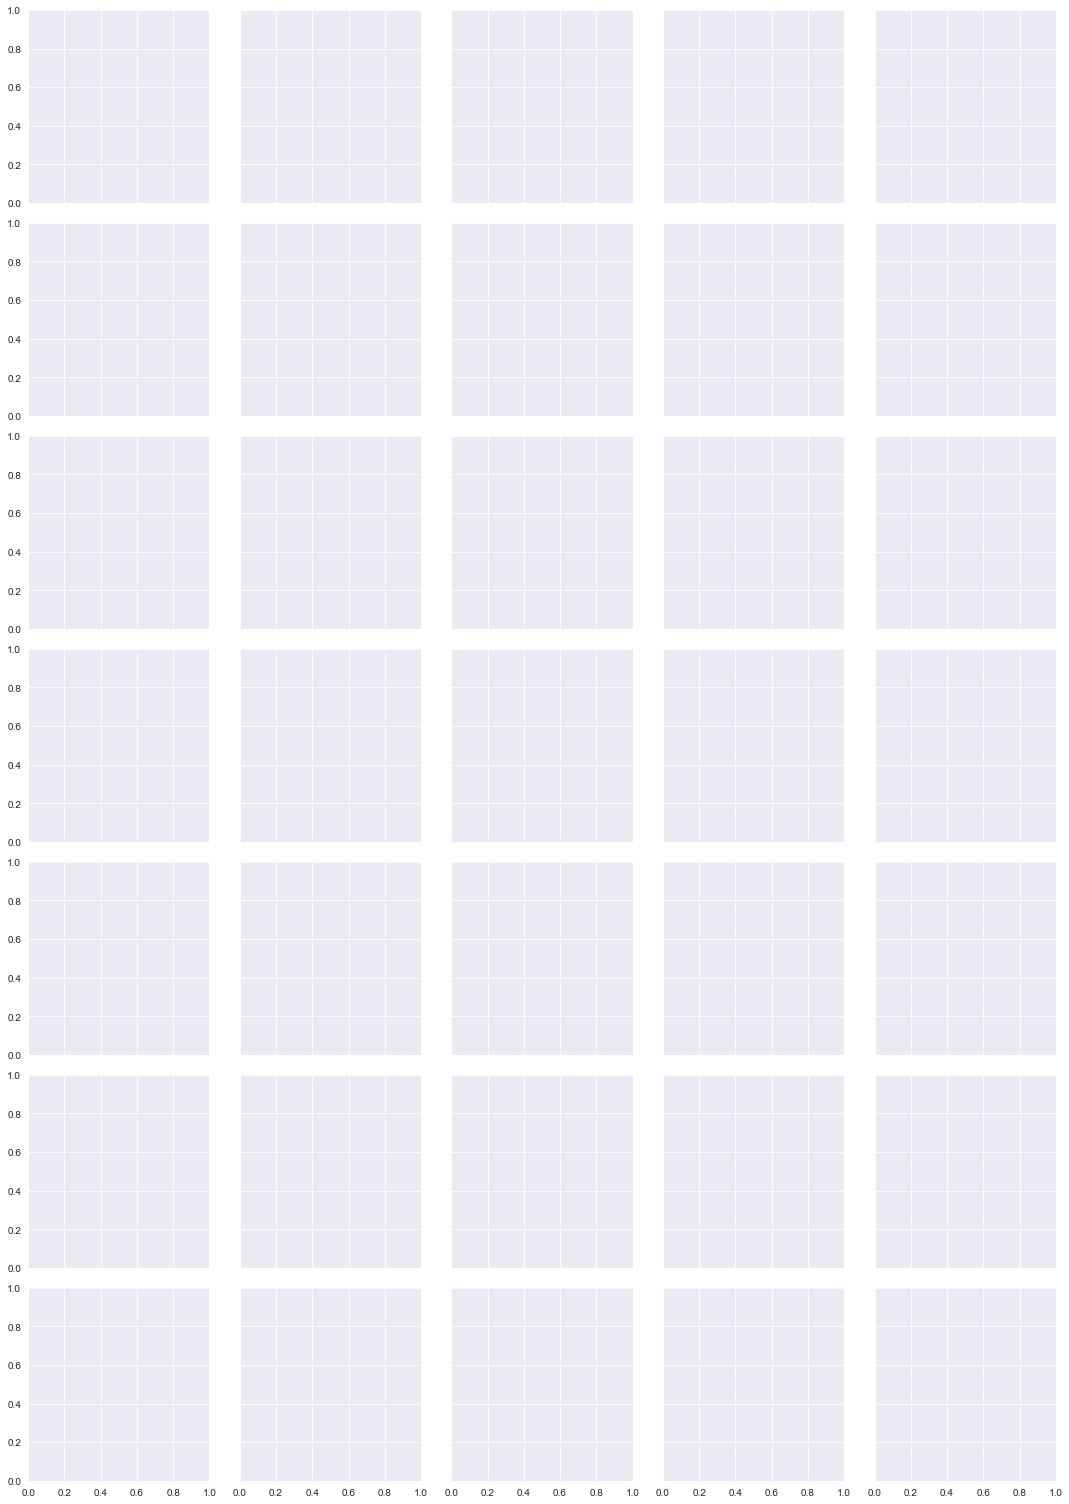

In [3]:
g = sns.FacetGrid(data=movies,row='Genre',col='Year')

#If you want to split up your data by Genre, then row=Genre (These will be arranged length wise)

# col = year, will arrange it width wise. (you have 5 years data, [2007, 2008, 2009, 2010, 2011])

#so let's day you plot a scatter plot (x=AudienceRating, y=CriticRating).
#Then row1 = Drama will give you get scatter plot for Drama Genre for all five years)

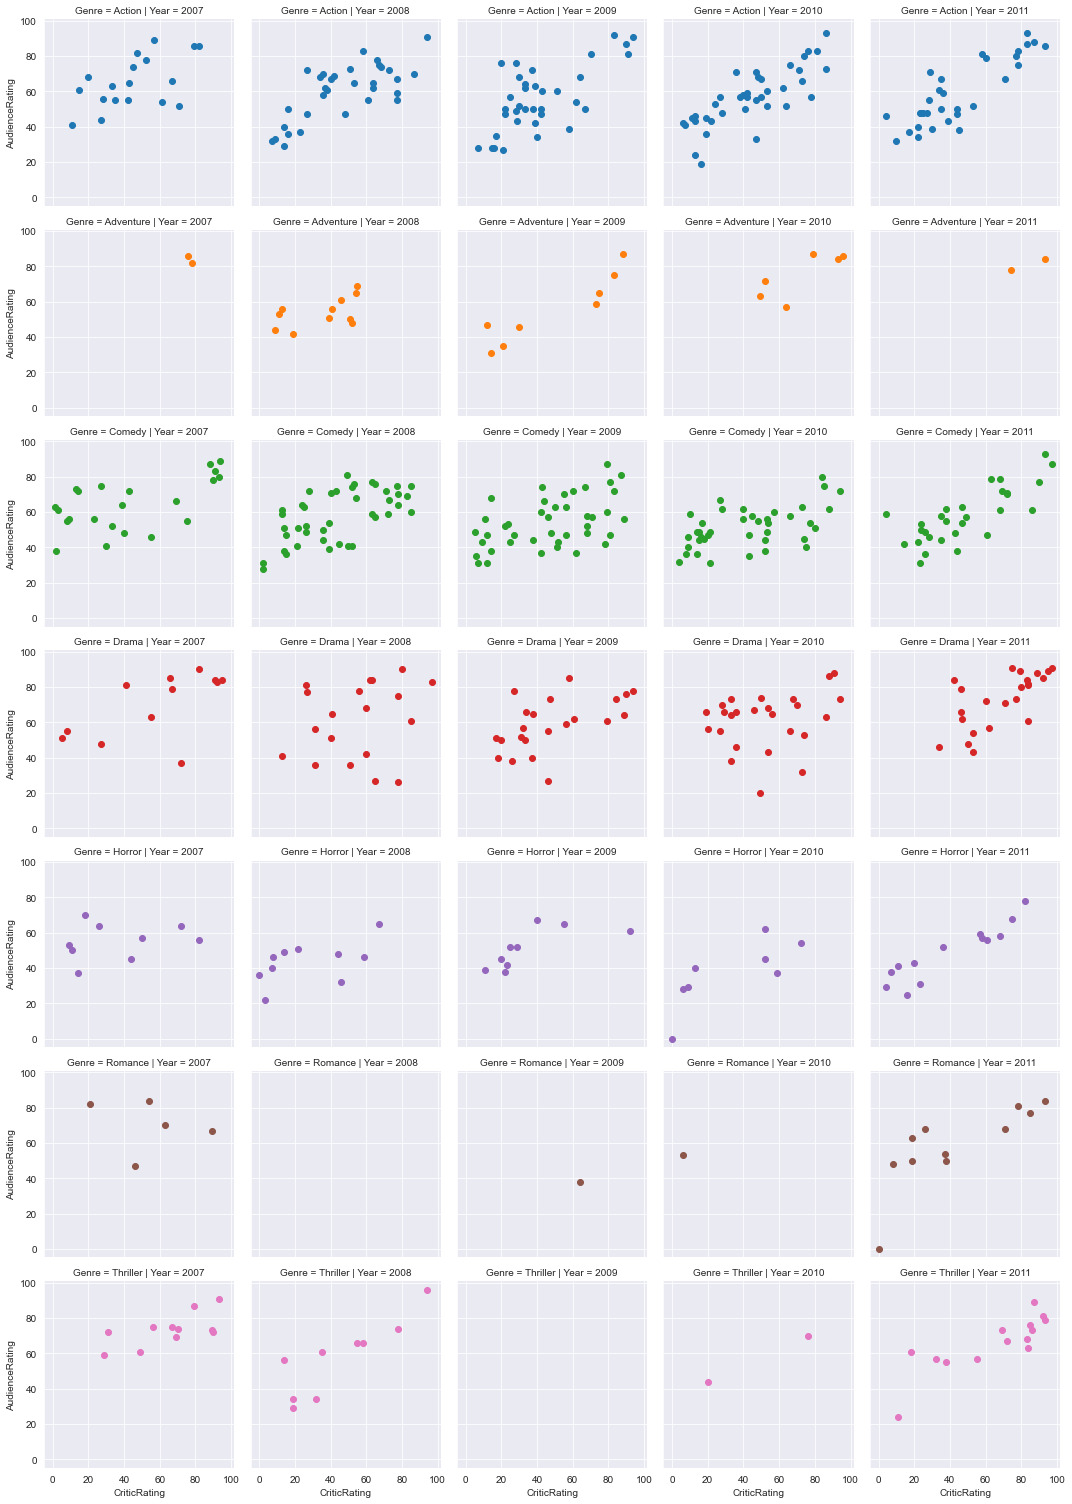

In [12]:
#in the previous cell you created your facet grid. Now we will populate it using map()

#map() function allows you to map something onto that facet grid.

#Let's populate it

#g = g.map(here we will place a scatter plot )

#This scatter plot will further split up in each facet using map()

#how do we create a scatter plot

#sns.lmplot()
#plt.scatter()

#This is how you will create a scatter plot using pyplot 
#plt.scatter(movies.CriticRating, movies.AudienceRating)

#The syntax of using map()
#object.map(function,x,y)

#g.map(plt.scatter,movies.CriticRating, movies.AudienceRating)

#But inorder for the above code to work,you must specify the facet grid in the same cell.

g = sns.FacetGrid(data=movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticRating', 'AudienceRating')

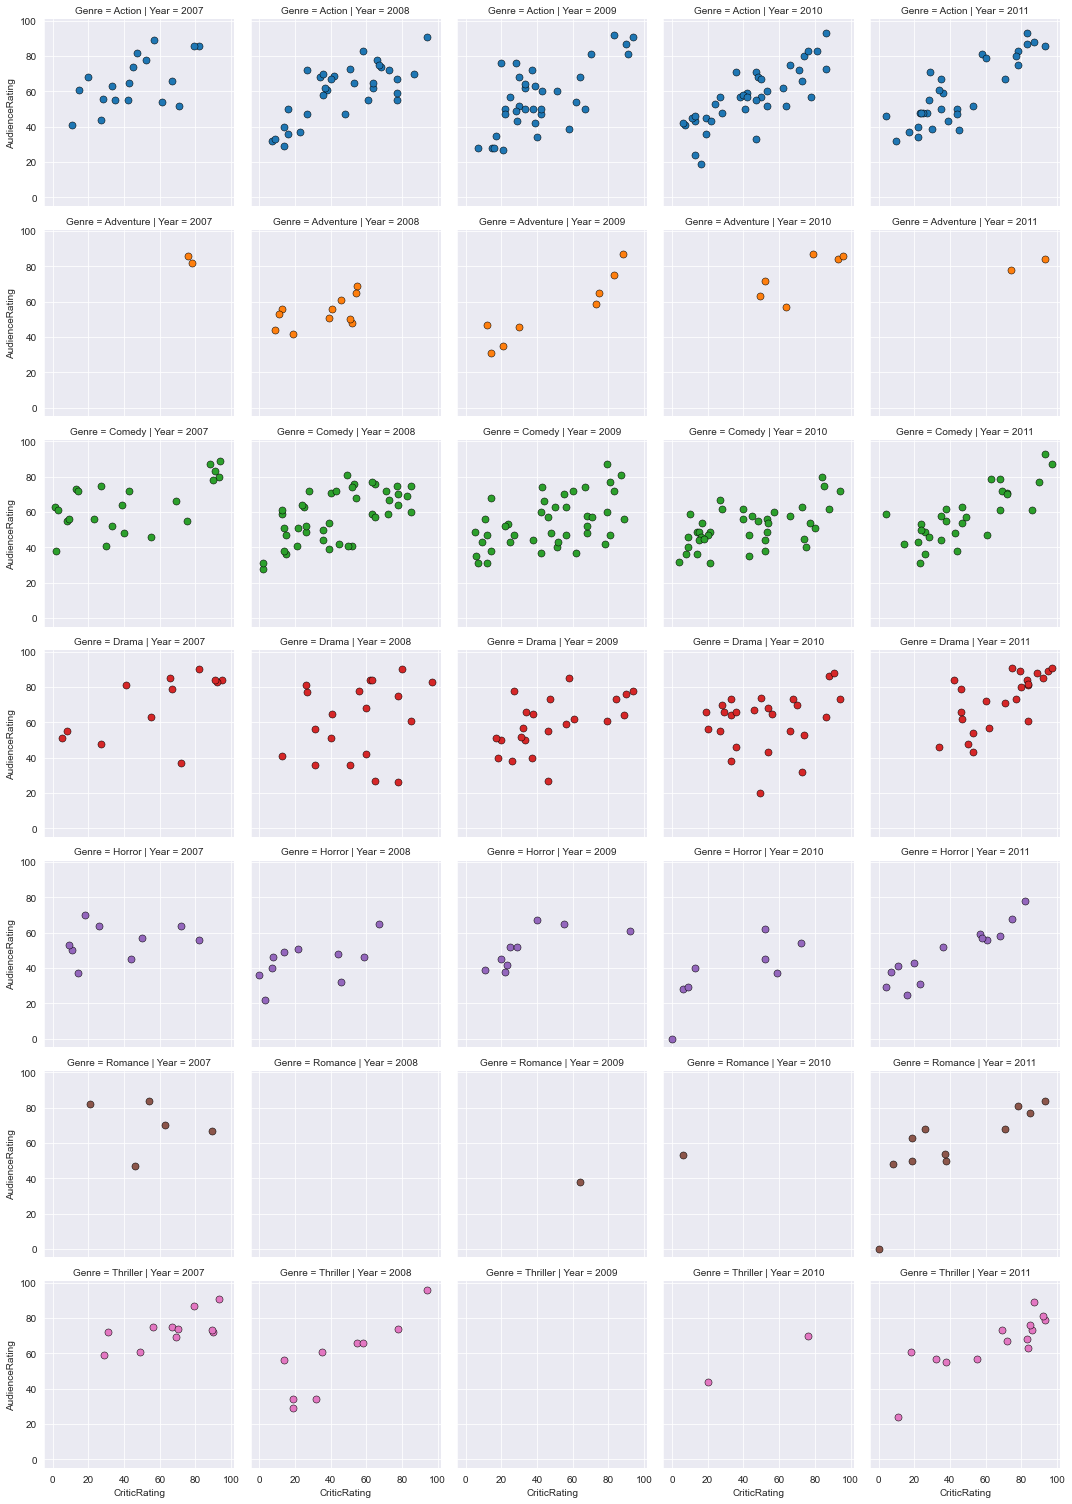

In [29]:
#how to add keyword arguments **kwargs

#you want to increase the size of the dots - use s
#you might want to the contor (the border) of dot - use edgecolor
#to change the thickness of the borders - use linewidth

#**kwargs are passed on as dictionary
#s is the size parameter
kws = dict(s=50, linewidth=0.5,edgecolor='Black')
kws

#This create your dictionary

#passing this kwargs to your map()

g = sns.FacetGrid(data=movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticRating', 'AudienceRating',**kws)

#now you can study how the relationship (AudienceRating vs CriticRating) evolved through out the year

In [32]:
kws


{'s': 50, 'linewidth': 0.5, 'edgecolor': 'Black'}

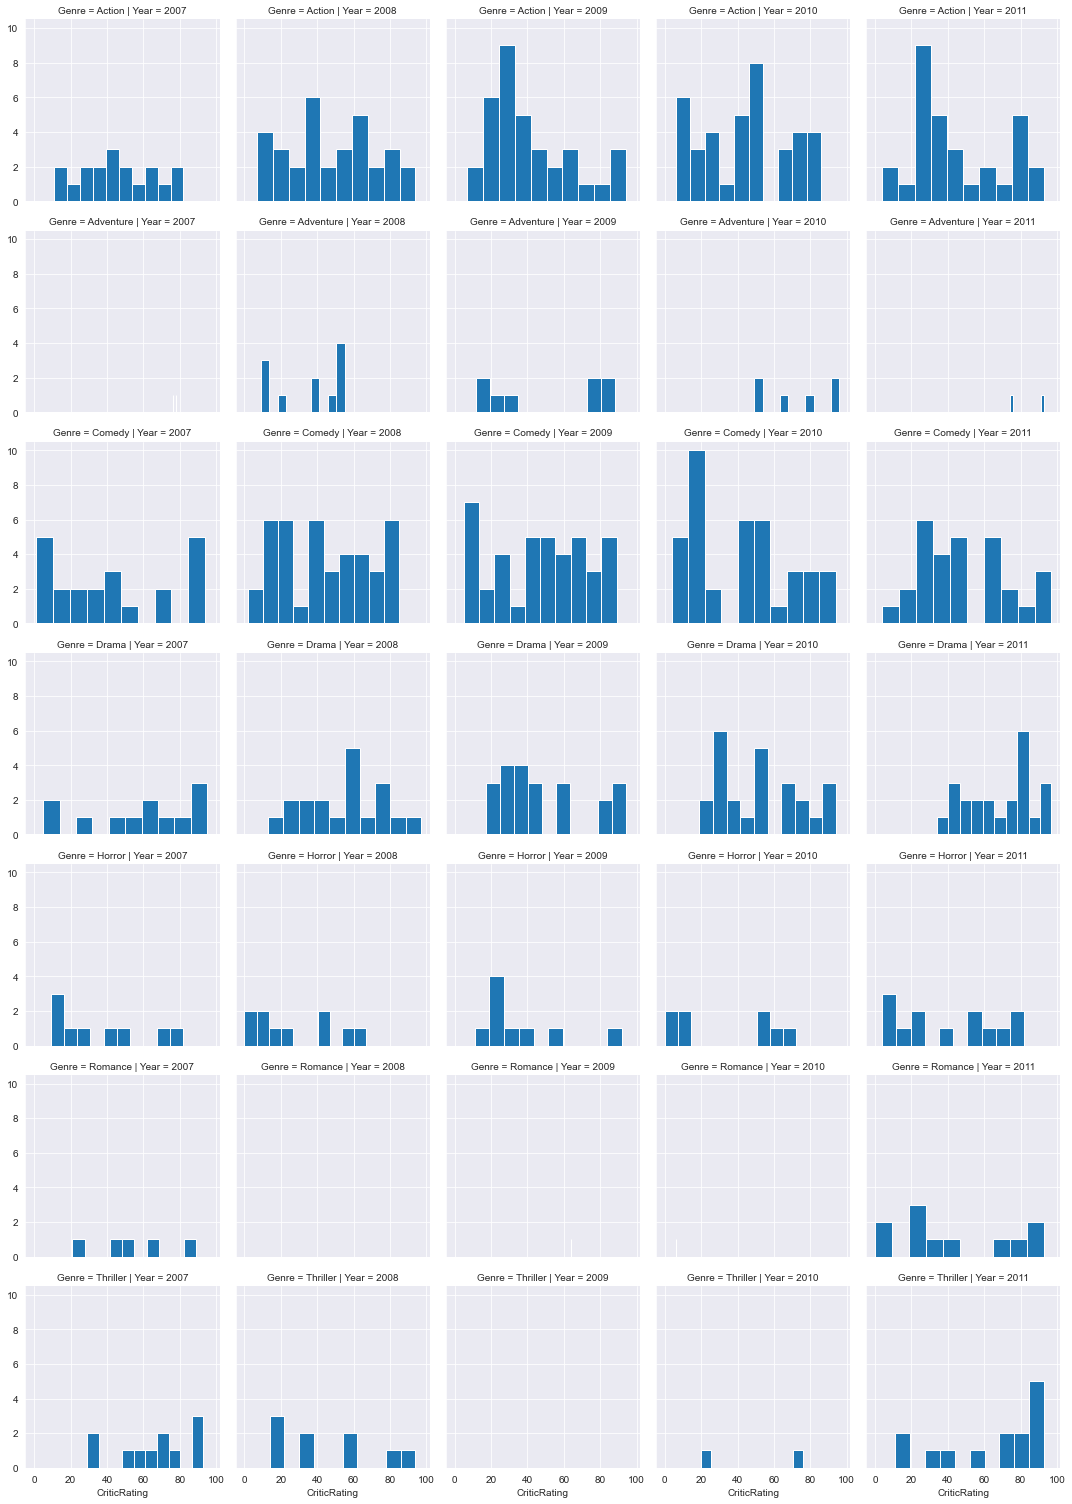

In [19]:
#can you populate facet grid with any type of chart
#histogram
#plt.hist(movies.Genre,bins=30)

plot = sns.FacetGrid(data=movies,col='Year',row ='Genre')
plot = plot.map(plt.hist,'CriticRating')

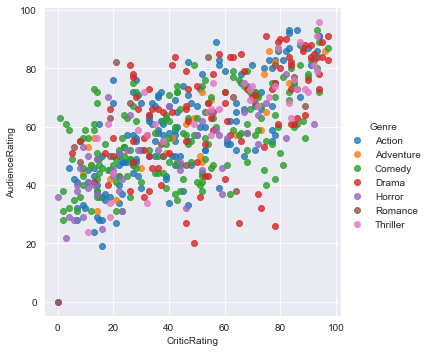

In [1]:
#Revision

import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style('darkgrid')

#importing data
os.getcwd()

movies = pd.read_csv('movies.csv')

movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillions', 'Year']



#changing data type to categorical type

movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

movies.Genre.cat.categories#This shows you the list that contains levels
movies.Year.unique() #This shows you levels

#subsetting
movies[2:10].head()
movies[['CriticRating','AudienceRating']].tail()

movies[::10].head() #This gives you every tenth row of the data frame

movies.Genre.head()

movies[movies.Genre=='Drama'].BudgetMillions
#This gives you budget for Drama Genre

#how to access individual element of a data frame
movies.iat[0,0]
movies.at[0,'Genre']

#plots
plot1=sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',fit_reg=False,hue='Genre')

In [2]:
movies.Year.cat.categories


Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

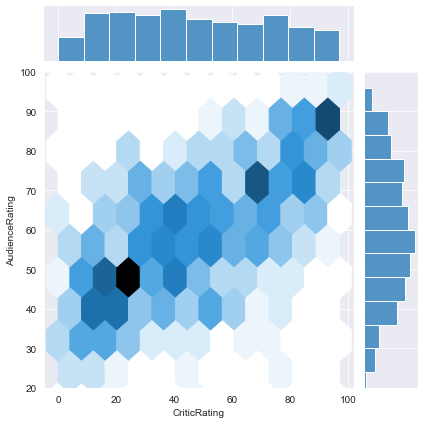

In [39]:
plot2 = sns.jointplot(data=movies,x='CriticRating',y='AudienceRating',kind='hex',ylim=(20,100))

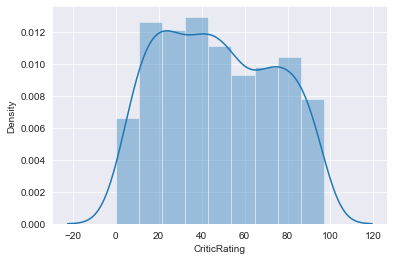

In [40]:
plot3=sns.distplot(movies.CriticRating)

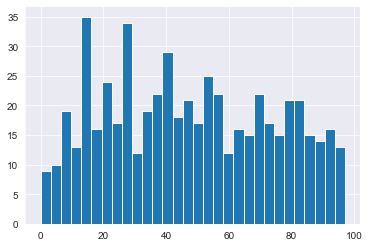

In [42]:
plot4=plt.hist(movies.CriticRating,bins=30,rwidth=1,stacked =False)
plt.show()

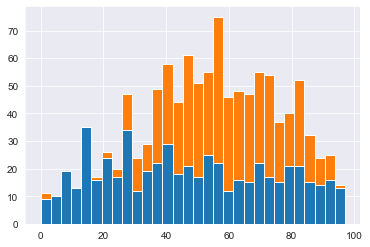

In [43]:
plot5=plt.hist(movies[['CriticRating','AudienceRating']],bins=30,stacked=True)

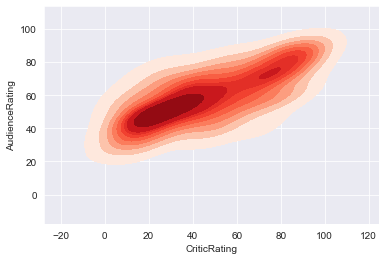

In [44]:
plot6=sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds')

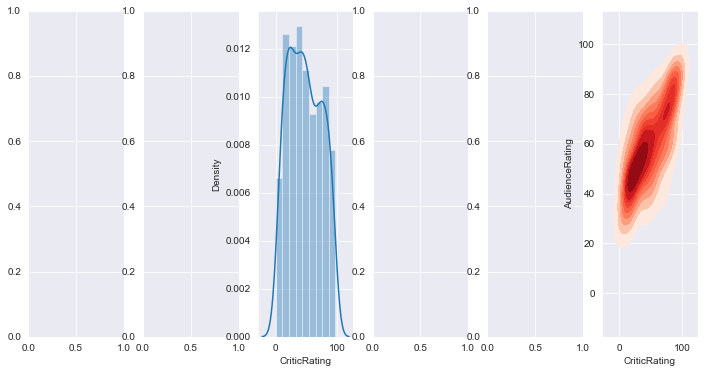

In [59]:
f,axes = plt.subplots(1,6,figsize=(12,6))
#plot1=sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',fit_reg=False,hue='Genre',ax=axes[0])
#plot2 = sns.jointplot(data=movies,x='CriticRating',y='AudienceRating',kind='hex',ylim=(20,100),ax=axes[1])
plot3=sns.distplot(movies.CriticRating,ax=axes[2])
#plot4=plt.hist(movies.CriticRating,bins=30,rwidth=1,stacked =False,ax=axes[3])
#plot5=plt.hist(movies[['CriticRating','AudienceRating']],bins=30,stacked=True,ax=axes[4])
plot6=sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds',ax=axes[5])